In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# defining our dataframes df1 and df2
df1=pd.read_csv('drive/MyDrive/Colab Notebooks/tmdb_5000_credits.csv')
df2=pd.read_csv('drive/MyDrive/Colab Notebooks/tmdb_5000_movies.csv')

In [4]:
df1.columns = ['id','tittle','cast','crew'] # to change the first column in df1 from 'movie_id' to 'id'
df2= df2.merge(df1,on='id') # merge df1 and df2 using the column id1

In [5]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [6]:
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


https://i.ibb.co/6ZXJ3bd/wr.png

[link text](https://)![image_2024-03-07_101852555.png](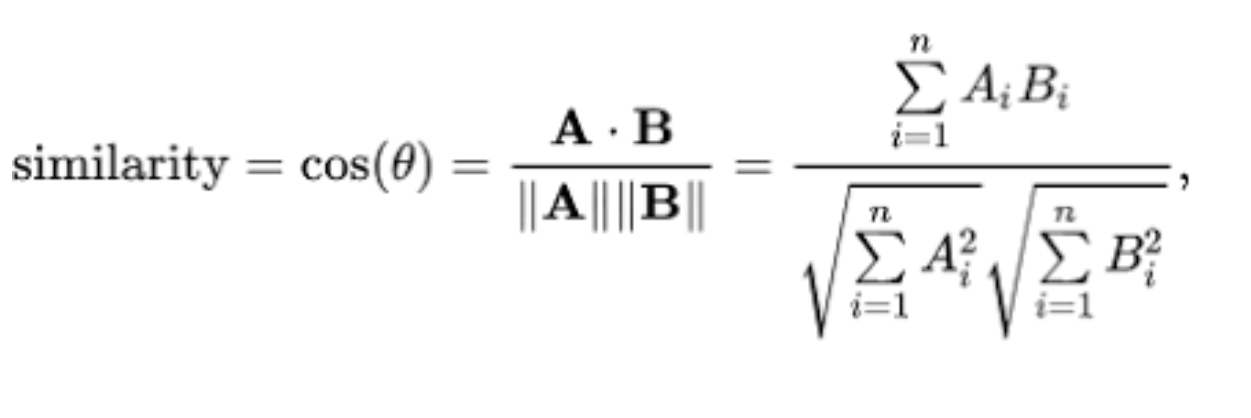![image_2024-03-07_101920503.png](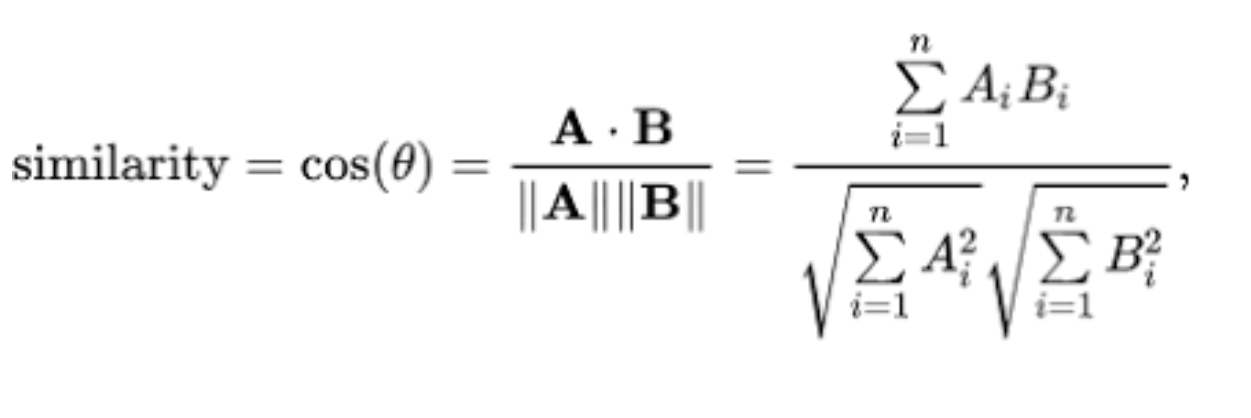![cosML.png](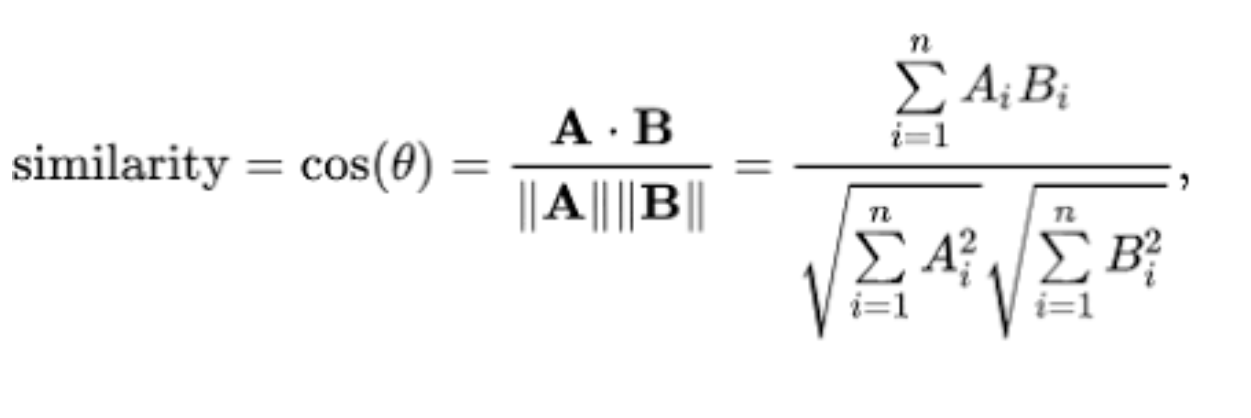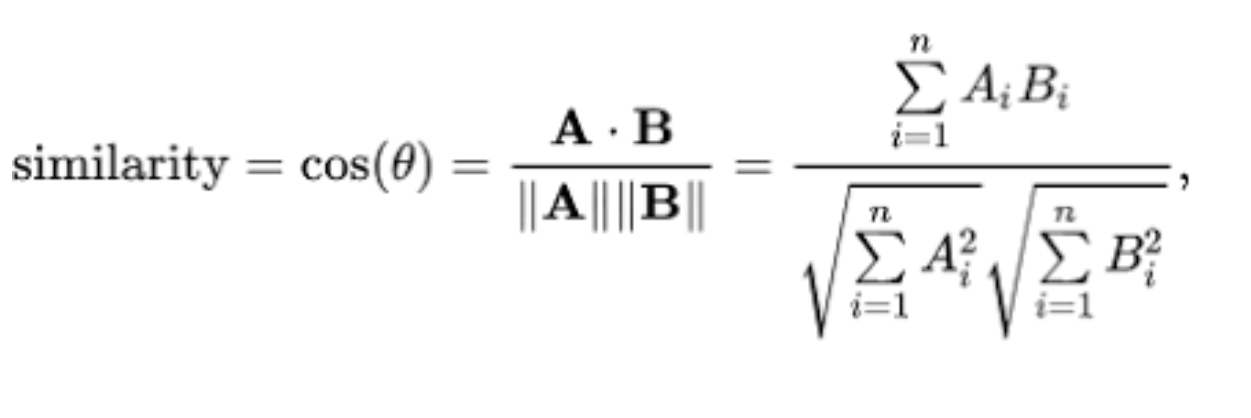)))#Demographic Filtering

In [7]:
C= df2['vote_average'].mean()
C

6.092171559442016

In [8]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

# We can filter out the movies that qualify for the chart. which are movies that has more than 'm' vote.![Screenshot 2024-03-01 191316.png](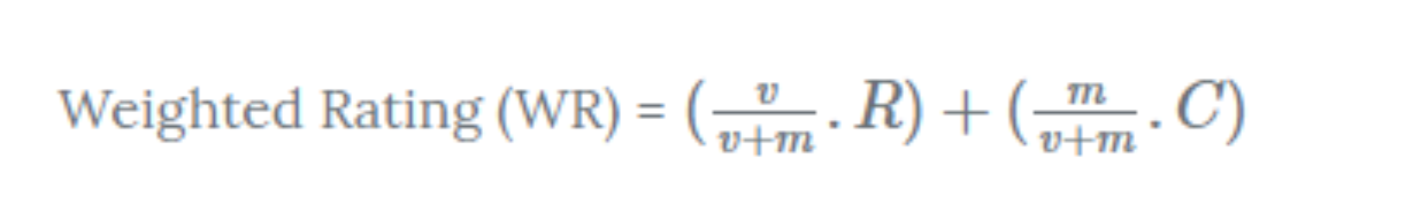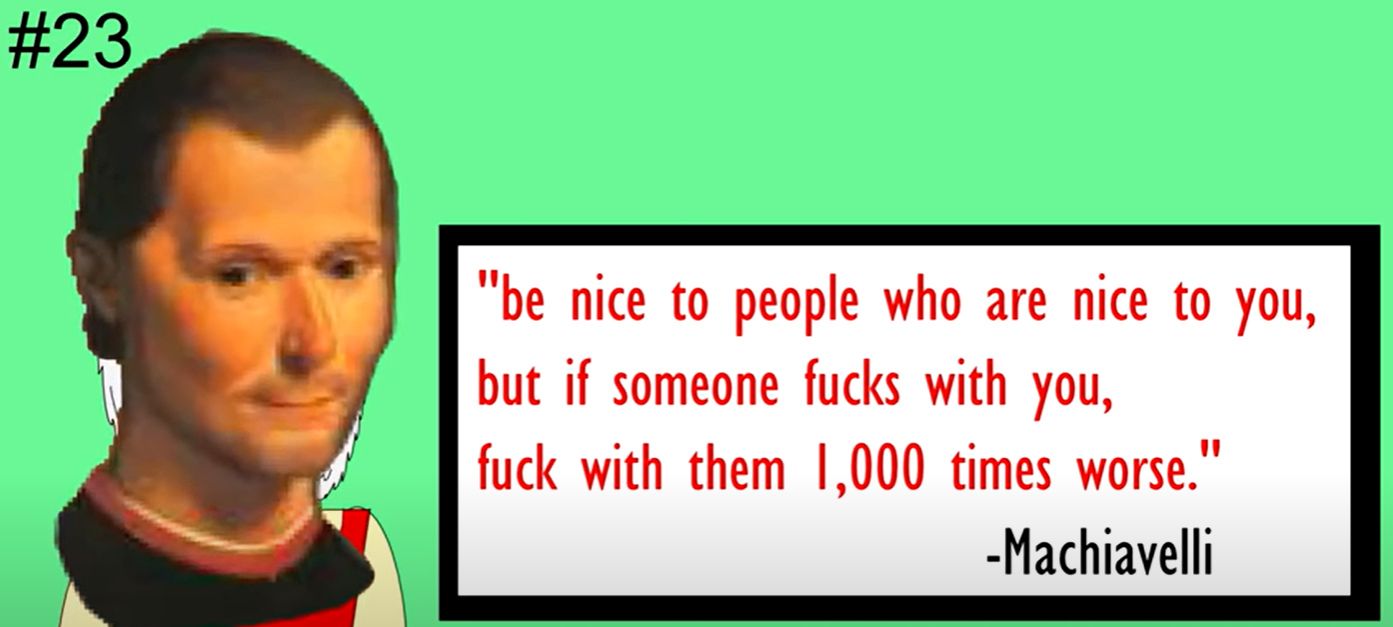)

In [9]:
print('our dataframe befor the cutoff')
df2.shape

our dataframe befor the cutoff


(4803, 23)

In [10]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
print('our dataframe after the cutoff')
q_movies.shape

our dataframe after the cutoff


(481, 23)

Our function `weighted_rating` will be applied to the new dataframe, composed of qualified movies.
This function apply the Weighter Rating formula:

In [11]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

Define a new feature 'score' and calculate its value with `weighted_rating()`.

In [12]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Trions le DataFrame en fonction de la fonction de score et affichons le titre, le nombre de votes, la moyenne des votes et la note ou le score pondéré des 10 meilleurs films.

In [13]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


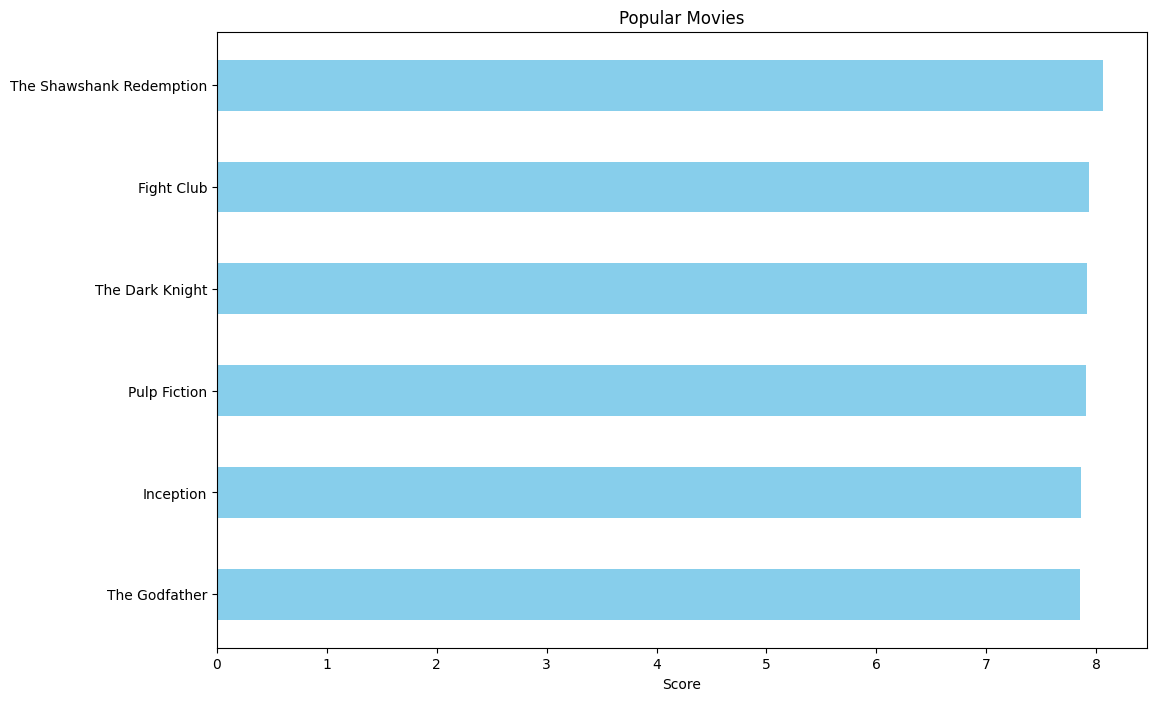

In [14]:
import matplotlib.pyplot as plt

top = q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

plt.figure(figsize=(12, 8))  # Increase the figure size
plt.barh(top['title'].head(6), top['score'].head(6), align='center', color='skyblue', height=0.5)  # Increase the bar height
plt.gca().invert_yaxis()
plt.xlabel("Score")
plt.title("Popular Movies")
plt.show()


<ipython-input-15-3fb59091f06a>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = top.pivot("title", "vote_average", "score")


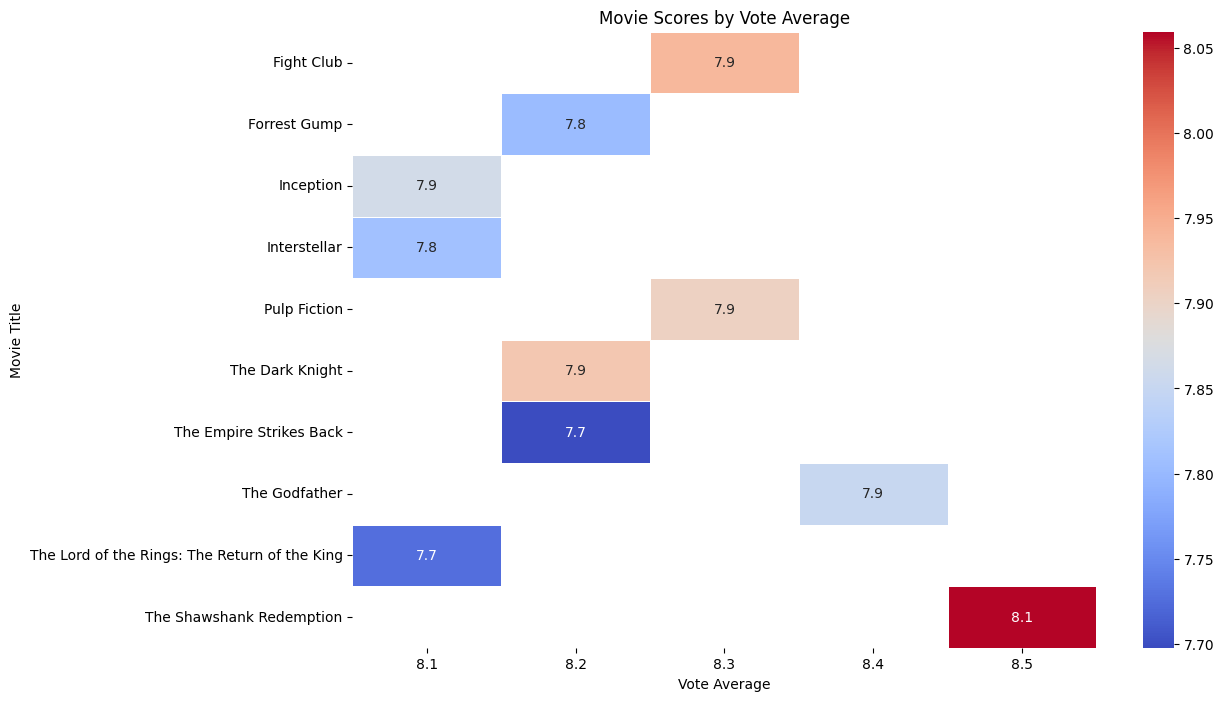

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to reshape the data for the heatmap
pivot_table = top.pivot("title", "vote_average", "score")

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5)
plt.title("Movie Scores by Vote Average")
plt.xlabel("Vote Average")
plt.ylabel("Movie Title")
plt.show()


Jusqu'ici nous avons créé notre premier recommandateur -basique- qui affiche des films très populaires et ils peuvent simplement être obtenus en triant l'ensemble de données par colonne de popularité.

Il faut noter bien que les recommandateurs démographiques offrent une vue d'ensemble des films recommandés pour l'ensemble des utilisateurs, sans prendre en compte les intérêts individuels. Pour une personnalisation plus fine, nous nous tournons vers un système plus sophistiqué : le filtrage basé sur le contenu.

# Content Based Filtering

2eme type:le **Filtrage basé sur le contenu**, ce système de recommandation utilise les caractéristiques intrinsèques d'un film, telles que son aperçu, distribution, équipe, mots-clés, slogans, etc., pour déterminer sa similarité avec d'autres films. En se basant sur ces similitudes de contenu, le système recommande des films qui sont le plus susceptible d'intéresser l'utilisateur.

En fait,le recommandeur basé sur la description du terrain
Nous calculerons les **scores de similarité** par paire pour tous les films en fonction de la description de leur intrigue et recommanderons des films en fonction de ce score de similarité.


---
***The plot description is given in the overview feature of our dataset. So let's take a look at the data:***





In [16]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object


Dans le traitement de texte, la conversion des vecteurs de mots dans chaque résumé est essentielle.

On va calculer  les vecteurs **TF-IDF(Term Frequency-Inverse Document Frequency)**  pour évaluer l'importance des mots on genere une matrice où chaque colonne représente un mot du vocabulaire général et chaque ligne représente un film.

*---Cette approche, intégrée dans **scikit-learn** via la classe
**TfIdfVectorizer**, réduit l'influence des mots fréquents dans les résumés de films, améliorant la précision des scores de similarité entre ces résumés.

In [17]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

**On remarque** dans ce matrice qu'on a plus 20 000 mots différents ont été utilisés pour décrire les 4 800 films de notre ensemble de données.



On va utiliser **la similarité cosinus** pour calculer une quantité numérique qui indique la similarité entre deux films et par ce qu'elle est facile et rapide. (Nous avons utiliser la fonction **Linear_kernel()** de sklearn au lieu de **cosine_similarities()** car elle est plus rapide)



In [18]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Nous allons définir une fonction qui prend le titre d'un film en entrée et génère une liste des 10 films les plus similaires:

premièrement nous avons besoin d’un mappage inversé des titres de films et des indices DataFrame.

In [19]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

**on va définir notre fonction de recommandation selon ces etapes:**

1-Obtenez l'index du film en fonction de son titre.

2-Obtenez la liste des scores de similarité cosinus pour ce film particulier avec tous les films.(Convertissez-le en une liste de tuples où le premier élément est sa position et le second est son score de similarité)

3-Triez la liste de tuples susmentionnée en fonction des scores de similarité.

4-Obtenez les 10 meilleurs éléments de cette liste.

5-Renvoie les titres correspondant aux indices des éléments supérieurs.


In [20]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [21]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

https://miro.medium.com/v2/resize:fit:1400/1*LfW66-WsYkFqWc4XYJbEJg.png

**Ignorez le premier élément car il fait référence à le film-même**

In [22]:
get_recommendations('Timecop')

18                Men in Black 3
2646              Silent Trigger
3507                    Deadfall
1460    The Horseman on the Roof
16                  The Avengers
594                  Bad Company
983             Eastern Promises
3850                The Betrayed
3121             Janky Promoters
4227             The Gatekeepers
Name: title, dtype: object


Malgré la capacité du système à identifier des films avec des intrigues similaires, la qualité des recommandations reste limitée, comme illustré par le cas de "The Dark Knight Rises", qui suggère tous les films de Batman au lieu de se focaliser sur les œuvres similaires du réalisateur Christopher Nolan.

# Amerlioration de Recommandateur basé sur les crédits, les genres et les mots clés

À partir des caractéristiques du casting, de l'équipe et des mots-clés, nous devons extraire les trois acteurs les plus importants, le réalisateur et les mots-clés associés à ce film.

---

On va tout d'abords convertir nos données qui sont présentes sous forme de listes **« stringifiées »** en une structure sûre et utilisable.

In [23]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

Ensuite, nous écrirons des fonctions qui nous aideront à extraire les informations requises de chaque fonctionnalité

In [24]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [25]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [26]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [27]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


L' étape suivante consisterait à convertir les noms et les instances de mots-clés en minuscules et à supprimer tous les espaces entre eux. Ceci est fait pour que notre vectoriseur ne compte pas de la même manière par exemple : *le Johnny de "Johnny Depp" et "Johnny Galecki"*

In [28]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [29]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

Nous sommes maintenant en mesure de créer notre **"metadata soup"**, qui est une chaîne contenant toutes les métadonnées que nous souhaitons alimenter notre vectoriseur (à savoir les acteurs, le réalisateur et les mots-clés).

In [30]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

Les étapes suivantes sont les mêmes que celles que nous avons faites avec notre plot description de notre Content based, la seule  différence est que nous utilisons **CountVectorizer()** au lieu de **TF-IDF**.(nous ne voulons pas minimiser la présence d'un acteur/réalisateur s'il a joué ou réalisé dans relativement plus de films)

In [31]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [32]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [33]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

Now we can reuse our **get_recommendations()** function by passing in the new **cosine_sim2** matrix as your second argument.

In [34]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [35]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

# **Collaborative Filtering**

In [36]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162738 sha256=961d7d3f944df2f8fa4737eb84cf8e8d3dd2225a4ceb0d7fb1c73bf77e9e02ec
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


 Notre recommandataire a réussi a nous donner des meilleures recommandations et capable de suggérer des films proches d'un certain film. Mais il n’est pas capable de capturer les goûts et de fournir des recommandations sur tous les genres.

 De plus, le moteur que nous avons construit n'est pas vraiment personnel dans le sens où il ne capture pas les goûts personnels et les préjugés d'un utilisateur.
 Par conséquent, dans cette section, nous utiliserons une technique appelée
  
  
#Filtrage Collaboratif

Est une technique de recommandation qui repose sur l'analyse des préférences et des comportements des utilisateurs, en exploitant les similarités entre leurs goûts pour générer des suggestions personnalisées.

---
Étant donné que les deux approches traditionnelles**User based filtering** et **Item Based Collaborative Filtering** ne sont pas efficaces et suffisants, montrent ainsi des limitations en termes d'efficacité et de scalabilité pour estimer les notes (ratings) manquantes des utilisateurs pour cetrains films. Nous avons utiliser la **Décomposition en Valeurs Singulières (SVD)**, implémentée avec la bibliothèque Surprise, pour améliorer la qualité des prédictions, réduisant ainsi le **RMSE** et le **MAE**.

In [37]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv('drive/MyDrive/Colab Notebooks/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [38]:


# Load your data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


Let us pick user with user Id 1 and check the ratings she/he has given:

In [39]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8968  0.8975  0.8977  0.9025  0.8904  0.8970  0.0039  
MAE (testset)     0.6891  0.6937  0.6920  0.6903  0.6881  0.6906  0.0020  
Fit time          1.57    1.40    1.35    1.72    2.46    1.70    0.40    
Test time         0.21    0.28    0.13    0.47    0.26    0.27    0.11    


{'test_rmse': array([0.89681072, 0.89749505, 0.89768322, 0.90248275, 0.89037021]),
 'test_mae': array([0.68907101, 0.69372321, 0.69202486, 0.69029391, 0.68808161]),
 'fit_time': (1.5720396041870117,
  1.3951265811920166,
  1.35215163230896,
  1.7189412117004395,
  2.455232858657837),
 'test_time': (0.20990777015686035,
  0.28313350677490234,
  0.12827372550964355,
  0.46573567390441895,
  0.25575685501098633)}

In [40]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [41]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.899401776802147, details={'was_impossible': False})

Pour le film id=302, nous avons obtenir une prédiction environ à 2,618.

 Une caractéristique surprenante de ce système de recommandation est qu'il ne se soucie pas de ce qu'est le film (ou de ce qu'il contient). Il fonctionne uniquement sur la base d'un identifiant de film attribué et tente de prédire les notes en fonction de la façon dont les autres utilisateurs ont prédit le film.

 #En résumé


Nous avons créer des recommandations en utilisant un filtrage démographique, basé sur le contenu et collaboratif. Bien que la SVD qui vise à améliorer la précision des modèles de recommandation, et le RMSE ainsi que le MAE sont utilisés pour mesurer cette précision.